In [3]:
!pip install nibabel

  Using cached nibabel-5.2.1-py3-none-any.whl.metadata (8.8 kB)
Using cached nibabel-5.2.1-py3-none-any.whl (3.3 MB)


In [4]:
# Load a functional image of subject 01
import nibabel as nb
img = nb.load('sub-OAS31473_sess-d0136_T1w.nii.gz')

In [29]:
print(img)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (176, 240, 256)
affine:
[[   1.20000458    0.            0.         -105.00079346]
 [   0.            1.0546875     0.          -83.55865479]
 [   0.            0.            1.0546875  -153.31576538]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 176 240 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.1999999 1.0546875 1.0546875 2.3       0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 

In [5]:
data = img.get_fdata()
data.shape

(176, 240, 256)

In [6]:
affine = img.affine
affine

array([[   1.20000458,    0.        ,    0.        , -105.00079346],
       [   0.        ,    1.0546875 ,    0.        ,  -83.55865479],
       [   0.        ,    0.        ,    1.0546875 , -153.31576538],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [7]:
header = img.header['pixdim']
header

array([1.       , 1.1999999, 1.0546875, 1.0546875, 2.3      , 0.       ,
       0.       , 0.       ], dtype=float32)

In [8]:
header = img.header['pixdim']
header

array([1.       , 1.1999999, 1.0546875, 1.0546875, 2.3      , 0.       ,
       0.       , 0.       ], dtype=float32)

In [11]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 622.4 kB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 1.0 MB/s eta 0:00:00ta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.7 MB/s eta 0:00:00:00:0100:01
Using cached kiwisolver-1.4.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


(176, 240, 256)


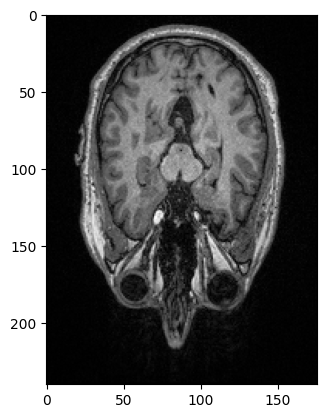

In [15]:
import matplotlib.pyplot as plt
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
print(data.shape)

(176, 240, 256)


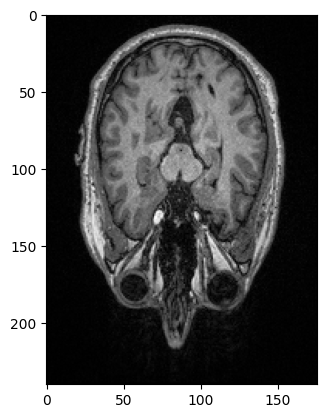

In [17]:
t1 = nb.load('sub-OAS31473_sess-d0136_T1w.nii.gz')
data = t1.get_fdata()
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
print(data.shape)

In [20]:
import numpy as np
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:")
print(affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

Affine:
[[   1.20000458    0.            0.         -105.00079346]
 [   0.            1.0546875     0.          -83.55865479]
 [   0.            0.            1.0546875  -153.31576538]
 [   0.            0.            0.            1.        ]]
Center: (87, 79, 145)


In [21]:
nb.aff2axcodes(affine)

('R', 'A', 'S')

In [22]:
nb.affines.voxel_sizes(affine)

array([1.20000458, 1.0546875 , 1.0546875 ])

In [25]:
 %matplotlib inline

<OrthoSlicer3D: sub-OAS31473_sess-d0136_T1w.nii.gz (176, 240, 256)>

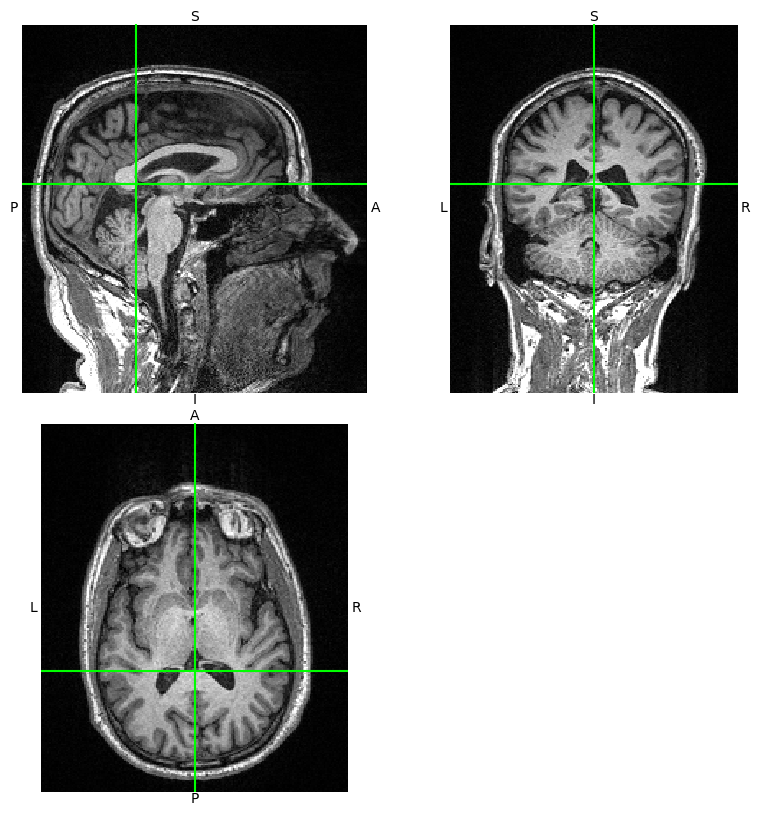

In [26]:
t1.orthoview()

In [30]:
pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import os, sys
import cv2
import numpy as np

'''
Converts all images in a directory to '.npy' format.
Use np.save and np.load to save and load the images.
Use it for training your neural networks in ML/DL projects. 
'''

# Path to image directory
path = ""
dirs = os.listdir("image")
dirs.sort()
x_train=[]

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert("RGB")
            im = np.array(im)
            x_train.append(im)

if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    imgset=np.array(x_train)
    np.save("imgds.npy",imgset)